Top 20 artist IDs:
[401, 317, 225, 58, 517, 467, 65, 37, 276, 461, 268, 581, 5, 905, 1708, 164, 412, 477, 514, 413]


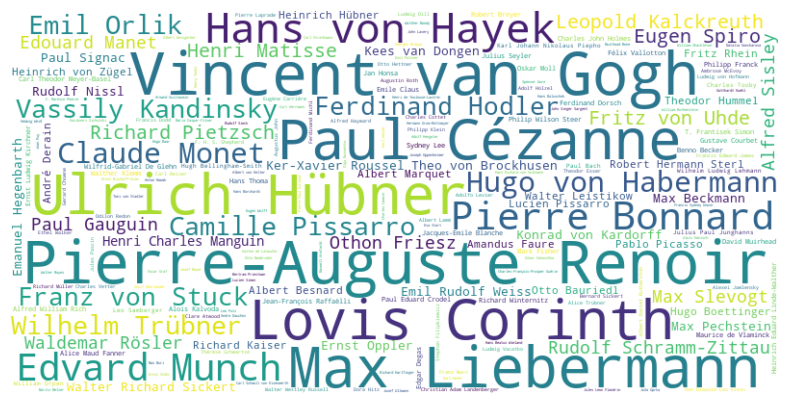

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

data = pd.read_csv(r'C:\TUW\courses\Vis\project\artvis\data\artvis_cleaned.csv')

artists = (data['a.firstname'].fillna('') + '*' + data['a.lastname'].fillna('')).str.strip()
artists = artists.str.replace(' ', '*', regex=False)
text = ' '.join(artists)

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis',
                      regexp=r'[^ ]+').generate(text)

modified_words = {}
for word in wordcloud.words_:
    first_part = word.split(' ')[0]
    cleaned_word = first_part.replace('*', ' ')
    modified_words[cleaned_word] = wordcloud.words_[word]

wordcloud.words_ = modified_words
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(modified_words)

top_20_artist_ids = data['a.id'].value_counts().head(20).index.tolist()
print("Top 20 artist IDs:")
print(top_20_artist_ids)

plt.figure(figsize=(10, 5))
plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()
